1️⃣ Import Libraries

In [31]:
# 0️⃣ Setup paths and imports
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------
# 1️⃣ Define project root (no chdir; keeps notebook reproducible)
# ------------------------
# 
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))

SRC_DIR = os.path.join(PROJECT_ROOT, "src")
if SRC_DIR not in sys.path:
    sys.path.append(SRC_DIR)

# ------------------------
# 2️⃣ Import config + project modules from src/
# ------------------------
from config import RAW_PATH  # src/config.py


2️⃣ Load Raw Data

In [32]:
from data_processing import load_raw_data, clean_data  # src/data_processing.py

# ------------------------
# 3️⃣ Load and clean data
# ------------------------
df_raw = load_raw_data(RAW_PATH)
df = clean_data(df_raw)

# ------------------------
# 4️⃣ Visualization defaults
# ------------------------
sns.set(style="whitegrid")
pd.set_option("display.max_columns", 100)

print("✅ Data loaded successfully")
print("Raw shape:", df_raw.shape)
print("Clean shape:", df.shape)
df.head()


✅ Data loaded successfully
Raw shape: (5000, 15)
Clean shape: (5000, 15)


,case_id,case_type,country,processing_stage,office_id,office_load,priority,document_complexity,documents_missing,client_response_delay_days,reassignment_count,days_in_stage,sla_target_days,total_processing_days,sla_breach
0,1,Tax,CA,Intake,106,51,Normal,Medium,1,18,1,3,21,43.7,True
1,2,Relocation,DE,Government Review,119,34,Normal,Low,6,4,2,4,35,65.2,True
2,3,Relocation,DE,Government Review,114,121,Urgent,Low,1,25,0,40,28,85.6,True
3,4,Visa Renewal,DE,Intake,110,94,Normal,Low,2,4,0,33,30,49.7,True
4,5,Tax,UK,Documentation,107,85,Normal,Medium,0,7,1,20,21,45.4,True


3️⃣ Dataset Overview

Number of rows and columns: (5000, 15)

Data Types:


case_id                         int64
case_type                      object
country                        object
processing_stage               object
office_id                       int64
office_load                     int64
priority                       object
document_complexity            object
documents_missing               int64
client_response_delay_days      int64
reassignment_count              int64
days_in_stage                   int64
sla_target_days                 int64
total_processing_days         float64
sla_breach                       bool
dtype: object


Missing Values:


,missing



SLA Breach Distribution:


sla_breach
True     4629
False     371
Name: count, dtype: int64


SLA Breach Percentage:
sla_breach
True     0.926
False    0.074
Name: proportion, dtype: float64


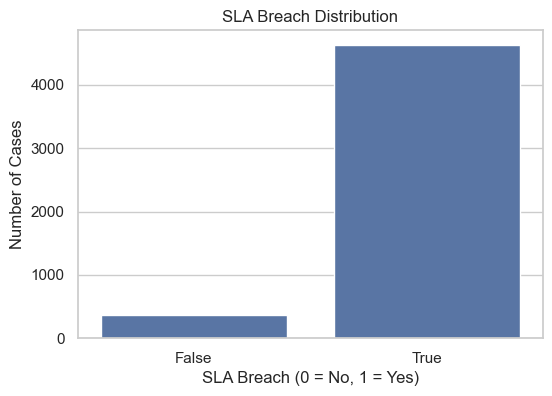

In [33]:
# ------------------------
# Basic dataset overview
# ------------------------

# Dataset shape
print("Number of rows and columns:", df.shape)

# Data types
print("\nData Types:")
display(df.dtypes)

# Missing values
print("\nMissing Values:")
display(df.isnull().sum().to_frame("missing").query("missing > 0"))

# ------------------------
# Target distribution
# ------------------------
print("\nSLA Breach Distribution:")
display(df['sla_breach'].value_counts())

print("\nSLA Breach Percentage:")
print(df['sla_breach'].value_counts(normalize=True).round(3))

plt.figure(figsize=(6,4))
sns.countplot(x='sla_breach', data=df)
plt.title("SLA Breach Distribution")
plt.xlabel("SLA Breach (0 = No, 1 = Yes)")
plt.ylabel("Number of Cases")
plt.show()


4️⃣ Summary Statistics

In [34]:

# Check class imbalance
breach_rate = df['sla_breach'].mean()
print(f"SLA Breach Rate: {breach_rate:.2%}")

if breach_rate < 0.20:
    print("⚠️ Dataset is imbalanced — precision/recall will matter more than accuracy.")


SLA Breach Rate: 92.58%


In [35]:
# ------------------------
# Operational drivers (numerical features)
# ------------------------

numeric_cols = [
    "office_load",
    "documents_missing",
    "client_response_delay_days",
    "reassignment_count",
    "days_in_stage",
    "total_processing_days",
    "sla_target_days"
]

summary = df.groupby("sla_breach")[numeric_cols].mean().T
summary.columns = ["No Breach", "Breach"]
display(summary)


,No Breach,Breach
office_load,68.919137,74.952258
documents_missing,2.614555,3.012314
client_response_delay_days,11.590296,15.244545
reassignment_count,1.115903,1.448909
days_in_stage,20.256065,23.535753
total_processing_days,68.677628,70.162368
sla_target_days,83.444744,31.433139


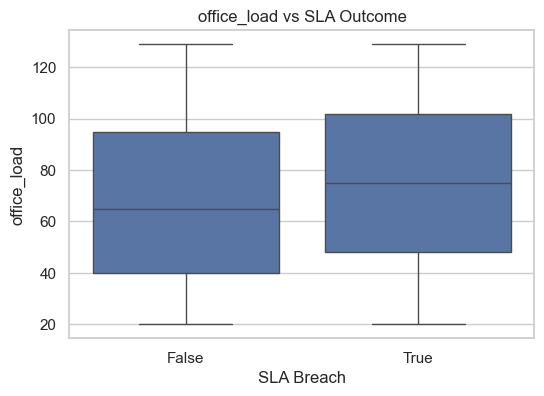

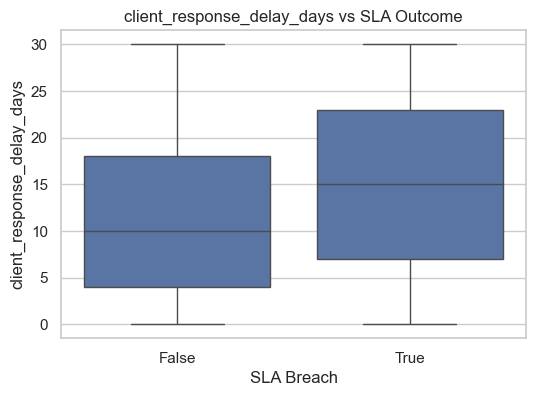

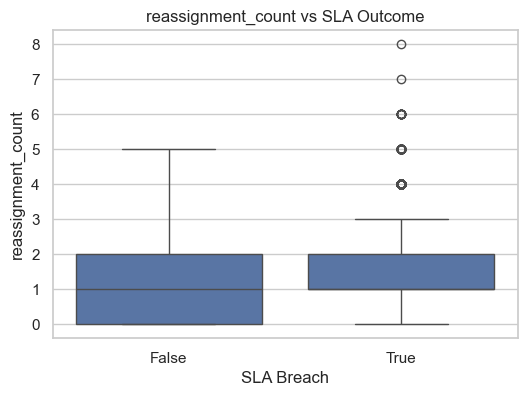

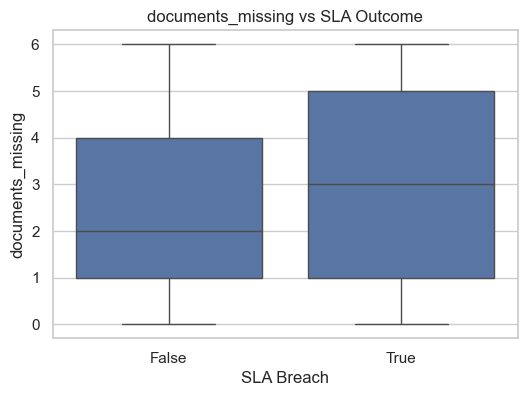

In [36]:
for col in ["office_load", "client_response_delay_days", "reassignment_count", "documents_missing"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="sla_breach", y=col, data=df)
    plt.title(f"{col} vs SLA Outcome")
    plt.xlabel("SLA Breach")
    plt.ylabel(col)
    plt.show()
